# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [23]:
monthly_count = df['count'].resample('ME').mean().round(0)

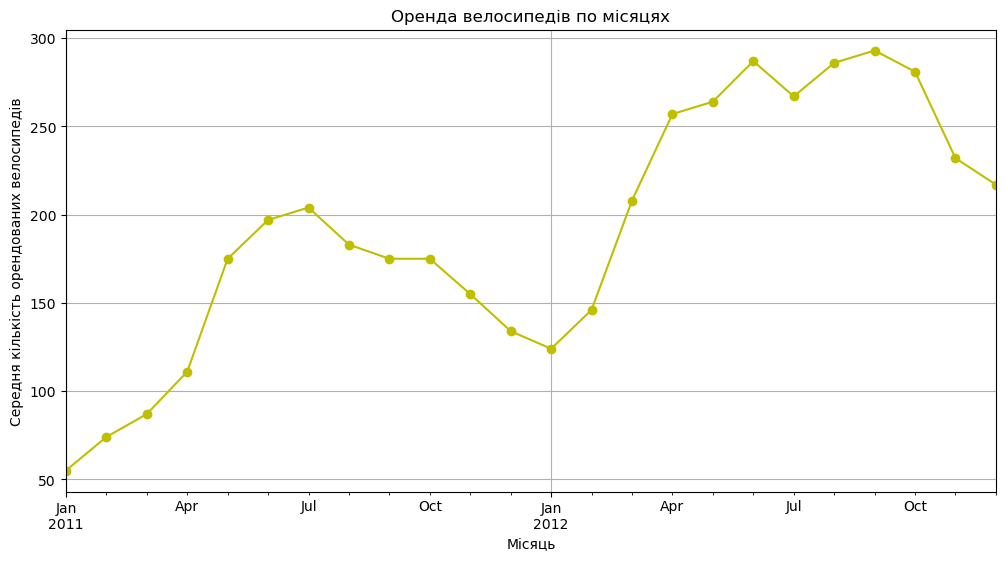

In [24]:
monthly_count.plot(
    figsize=(12, 6),
    marker='o',
    title='Оренда велосипедів по місяцях',
    color='y',
    xlabel='Місяць',
    ylabel='Середня кількість орендованих велосипедів',
    grid=True
);

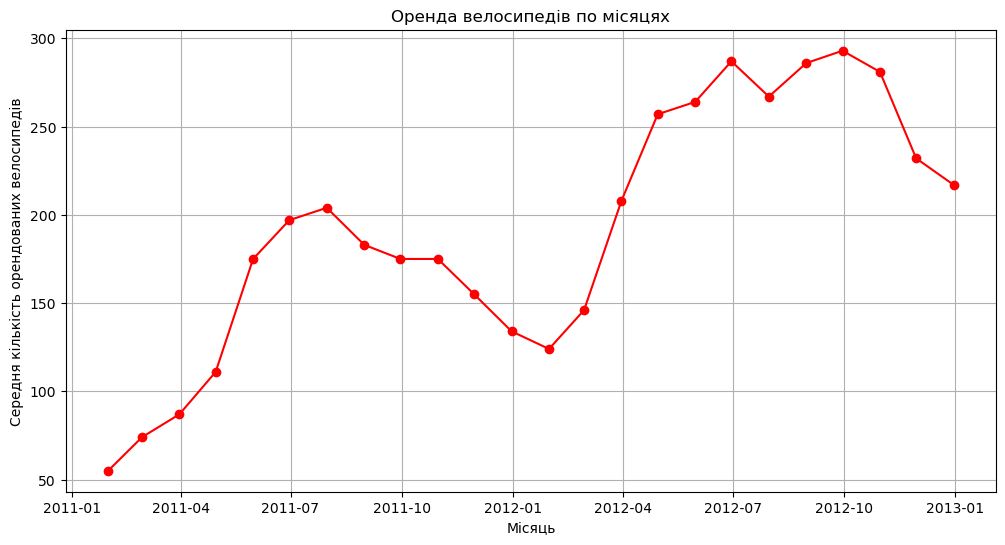

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_count, 'o-', color='red')
plt.title('Оренда велосипедів по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість орендованих велосипедів')
plt.grid(True);

Візуальні відмінності графіків, побудованих двома різними способами, заключаються у різних форматах візуалізації дат на осі ОХ, відрізняється сітка розмітки, а також відцентрованістю самого графіка.
Більше довподоби перший графік, через звичніше форматування дати, але це просто треба мати на увазі.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [26]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

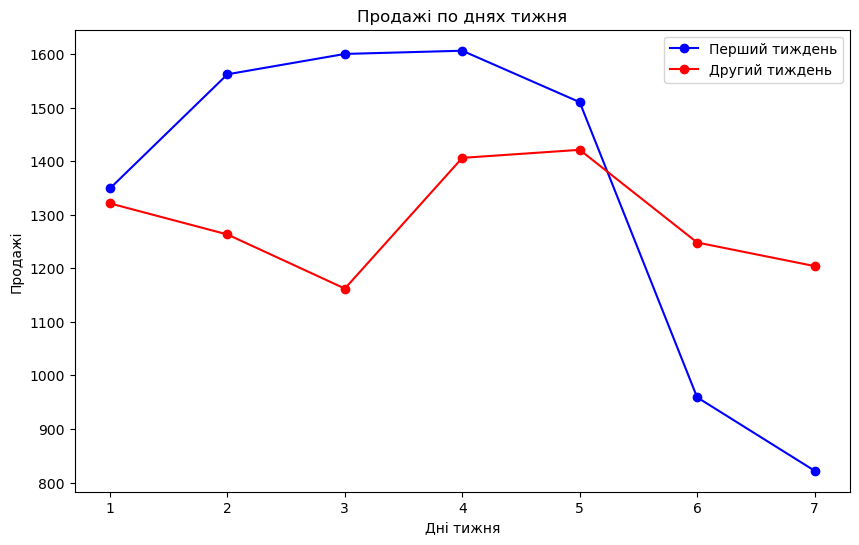

In [27]:
plt.figure(figsize=(10,6))
plt.plot(days, sales_week1, 'o-b', label='Перший тиждень')
plt.plot(days, sales_week2, 'o-r', label='Другий тиждень')
plt.title('Продажі по днях тижня')
plt.xlabel('Дні тижня')
plt.ylabel('Продажі')
plt.legend();

In [28]:
import numpy as np

std_week1 = np.std(sales_week1).round(4)
std_week2 = np.std(sales_week2).round(4)

print(std_week1, std_week2)

299.9986 90.9061


Аналізуючи графіки, можна зробити висновок, що на другому тижні продажі були більш стабільними. Це також можна підтвердити розразувавши стандартне відхилення, яке для другого тижня складає набагато менше, ніж для першого.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [29]:
avg_temp = df.groupby('month')['temp'].mean().round(2)

In [30]:
avg_count_qarter = df['count'].resample('QE').mean().round(0)
quarters = avg_count_qarter.index.to_period('Q').astype(str)

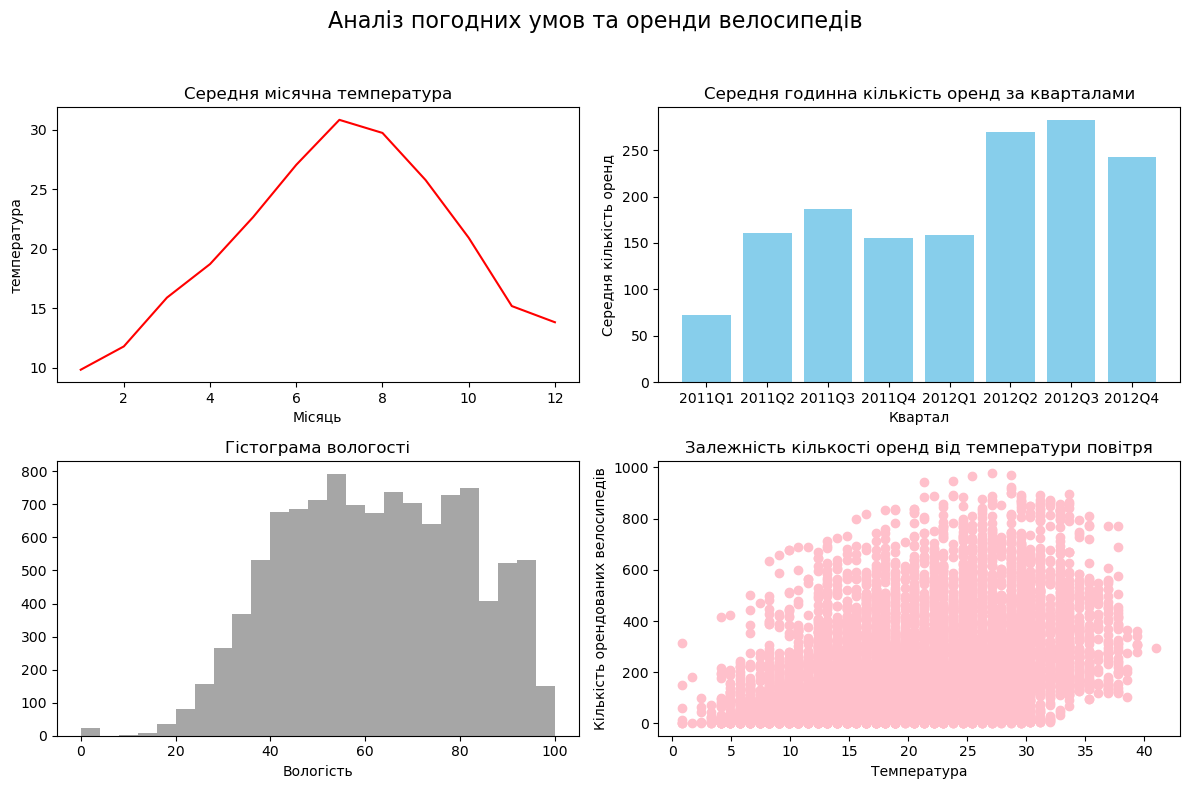

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(avg_temp, color='red')
plt.title('Середня місячна температура')
plt.xlabel('Місяць')
plt.ylabel('температура')

plt.subplot(2,2,2)
plt.bar(quarters, avg_count_qarter.values, color='skyblue')
plt.title('Середня годинна кількість оренд за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Середня кількість оренд')

plt.subplot(2,2,3)
plt.hist(df['humidity'], bins=25, color='grey', alpha=0.7)
plt.title('Гістограма вологості')
plt.xlabel('Вологість')

plt.subplot(2,2,4)
plt.scatter(df['temp'], df['count'], color='pink')
plt.title('Залежність кількості оренд від температури повітря')
plt.xlabel('Температура')
plt.ylabel('Кількість орендованих велосипедів')

plt.suptitle('Аналіз погодних умов та оренди велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

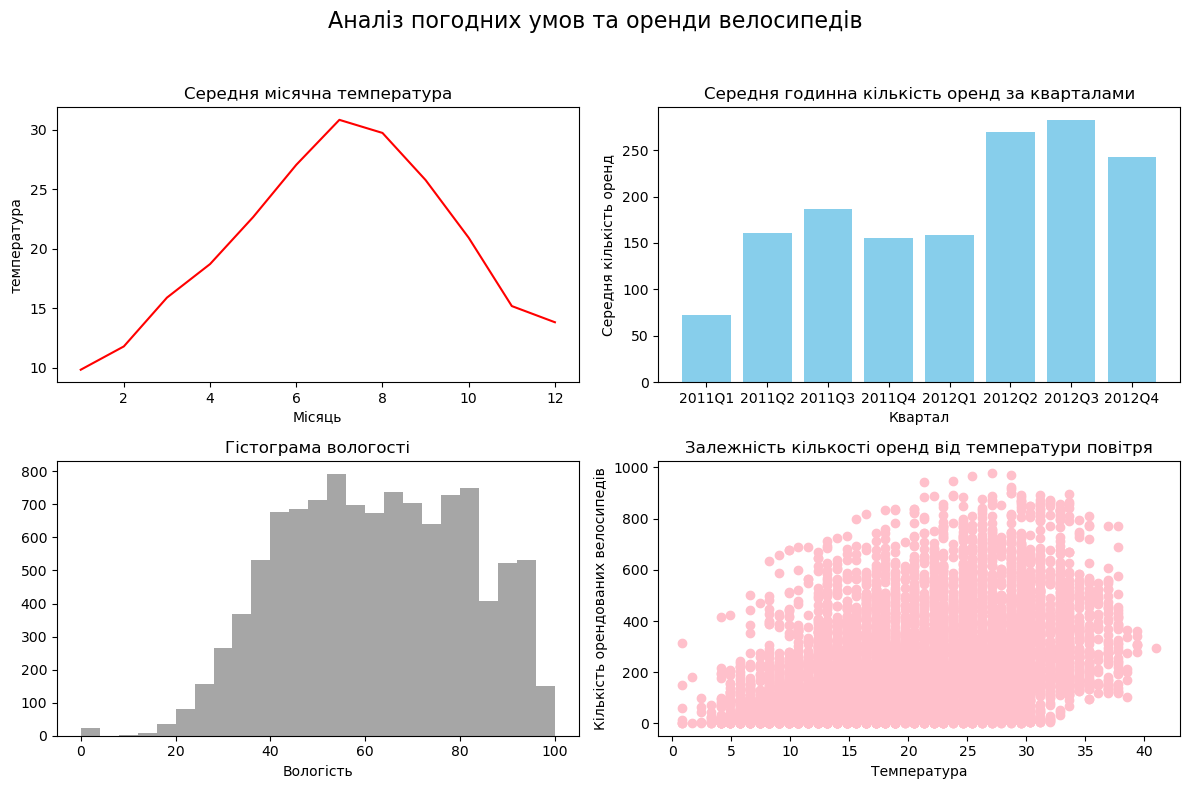

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(avg_temp, color='red')
ax[0, 0].set_title('Середня місячна температура')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('температура')

ax[0, 1].bar(quarters, avg_count_qarter.values, color='skyblue')
ax[0, 1].set_title('Середня годинна кількість оренд за кварталами')
ax[0, 1].set_xlabel('Квартал')
ax[0, 1].set_ylabel('Середня кількість оренд')

ax[1, 0].hist(df['humidity'], bins=25, color='grey', alpha=0.7)
ax[1, 0].set_title('Гістограма вологості')
ax[1, 0].set_xlabel('Вологість')

ax[1, 1].scatter(df['temp'], df['count'], color='pink')
ax[1, 1].set_title('Залежність кількості оренд від температури повітря')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість орендованих велосипедів')

fig.suptitle('Аналіз погодних умов та оренди велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.subplot() — це простий спосіб, але ти сам вибираєш номер комірки кожним викликомб через що можна заплутатись.
plt.subplots() — більш сучасний спосіб, який одразу створює всі осі та працюєш із ними як з об’єктами, значно зручніше і зрозуміліше.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [33]:
monthly_stats = df['count'].resample('ME').agg(['max', 'mean', 'min'])

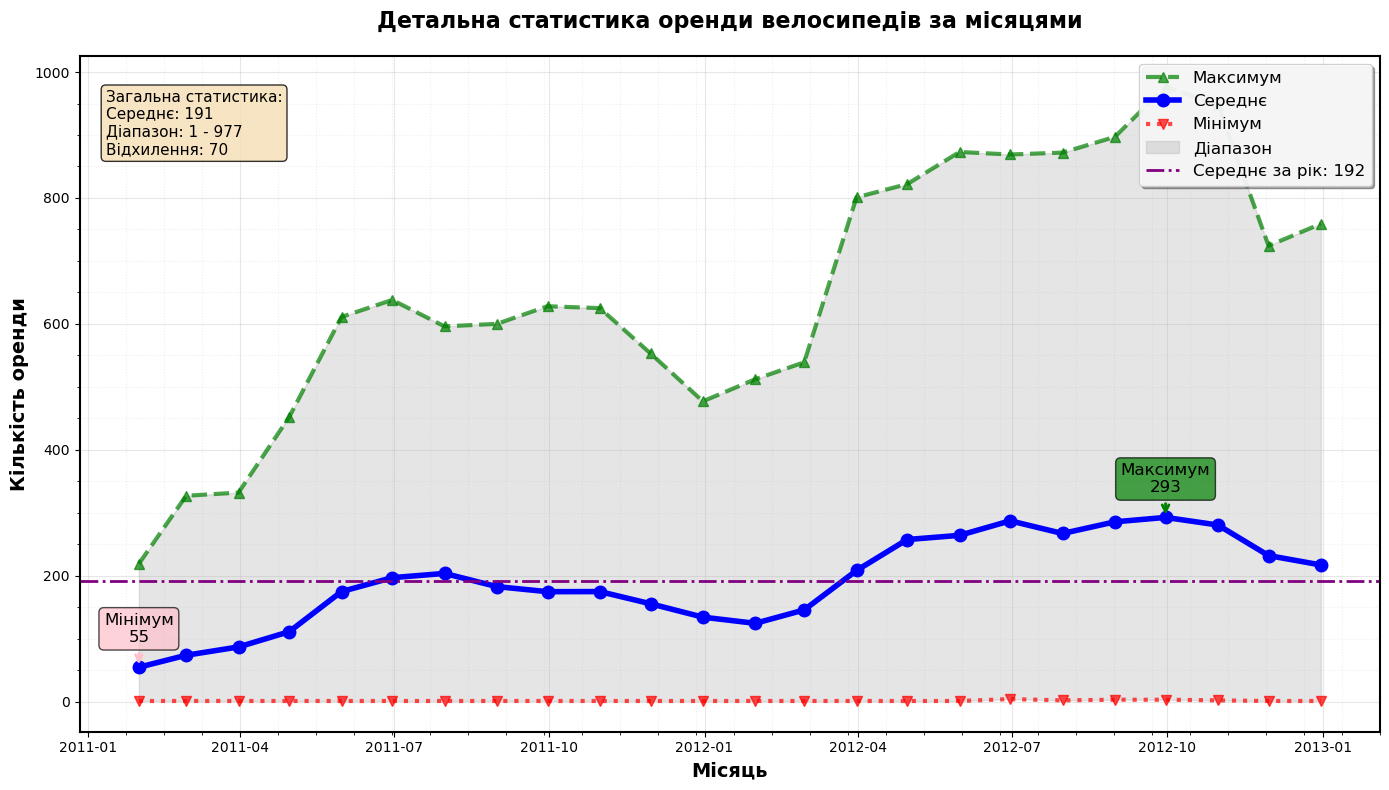

In [34]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=3,
        label='Максимум', markersize=7, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=4,
        label='Середнє', markersize=9)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=3,
        label='Мінімум', markersize=7, alpha=0.7)

ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 40),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.7))

min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 40),
            arrowprops=dict(arrowstyle='->', color='pink', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='pink', alpha=0.7))

ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=16, fontweight='bold', pad=20)

ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

textstr = f'Загальна статистика:\n'
textstr += f'Середнє: {monthly_stats["mean"].mean():.0f}\n'
textstr += f'Діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Відхилення: {np.std(monthly_stats['mean']):.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

1. Анотації можуть бути корисними, коли графік є статичним, але треба візуалізувати дані в конкретній точці.
2. fill_between() використовується для зафарбовування певної області між двома кривими, або між кривою та віссю.
3. Текстовий блок також допомагає конкретизувати необхідні показники.